<a href="https://colab.research.google.com/github/andres-merino/Curso-FundMachineLearning/blob/main/1-Webinar/Webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i0.wp.com/see-ec.org/wordpress/wp-content/uploads/2023/01/LOGO-SEE-texto-blanco-3.png?w=1356&ssl=1" width="200">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#008dc3" size="7">|</font><br>
            <font color="#008dc3" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#008dc3" size="5">
                <b>Sociedad Ecuatoriana de Estadística</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#008dc3" size="4">
                Fundamentos del Machine Learning &bull; Mi primer modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#008dc3" size="3">
                Andrés Merino &bull; Febrero 2026
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='008dc3'> Introducción </font>

Este notebook está diseñado como una guía introductoria para el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos simulados y reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Los paquetes necesarios son:

In [1]:
# Paquetes necesarios
import numpy as np  # Para generación de datos y operaciones numéricas
import pandas as pd  # Para manejo de datos estructurados
import matplotlib.pyplot as plt  # Para visualización de datos
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.metrics import mean_squared_error # Para evaluación del modelo
from sklearn.model_selection import train_test_split

---
## <font color='008dc3'> Datos simulados</font>


Utilicemos datos ficticios:

In [2]:
# Datos proporcionados
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
y = [4, 6, 10, 12, 15, 12, 18, 20, 20, 23, 27, 25, 29]

# Crear un DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y
})

# Mostrar los datos
display(df)

,x,y
0,1,4
1,2,6
2,3,10
3,4,12
4,5,15
5,6,12
6,7,18
7,8,20
8,9,20
9,10,23


Grafiquemos su dispersión:

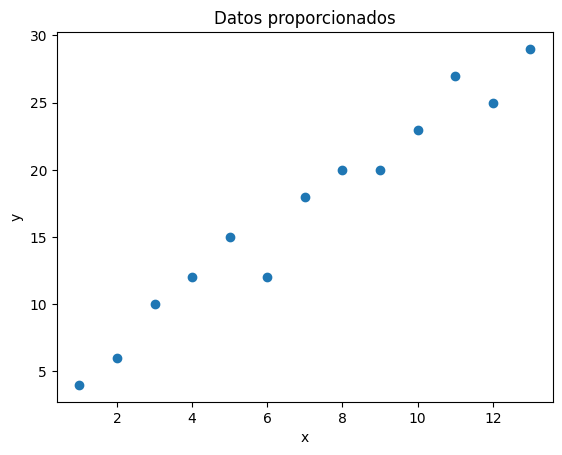

In [3]:
# Gráfico de dispersión de df
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos proporcionados')
plt.show()


---
## <font color='008dc3'> Características y etiquetas </font>

Ahora, separamos las características y las etiquetas.

In [4]:
# Dividir el conjunto de datos en características y etiquetas
features = ['x']
X = df.loc[:, features]
y = df.loc[:, ['y']]

---
## <font color='008dc3'> Conjunto de entrenamiento y prueba </font>

Con esto, dividimos los datos en dos conjuntos: uno para entrenamiento y otro para prueba.

In [5]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Ahora, visualizamos el tamaño de los conjuntos de entrenamiento y prueba.

In [6]:
# Reviso las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (10, 1)
y_train: (10, 1)
X_test: (3, 1)
y_test: (3, 1)


---
## <font color='008dc3'> Entrenamiento </font>

Definimos un modelo de regresión lineal y lo entrenamos con los datos de entrenamiento.

In [7]:
# Crear el modelo y ajustarlo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Visualizar los coeficientes
print('Ecuación de la recta:')
print('y =', modelo.coef_[0][0], 'x +', modelo.intercept_[0])


Ecuación de la recta:
y = 2.0900723208415526 x + 2.296515450361598


Visualizamos el modelo entrenado.

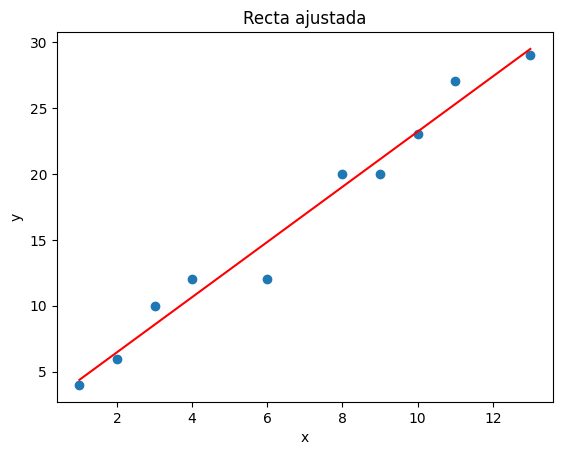

In [8]:
# Graficar la recta
plt.scatter(X_train, y_train)
plt.plot(X, modelo.coef_[0][0] * X + modelo.intercept_[0], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta ajustada')
plt.show()


---
## <font color='008dc3'> Evaluacion </font>

Realizamos predicciones con el conjunto de prueba y evaluamos el modelo.

In [9]:
# Predicciones del modelo
y_pred = modelo.predict(X_test)

# Comparar las predicciones con los datos de prueba
df_predicciones = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicción': y_pred.flatten()
})
display(df_predicciones)

,Actual,Predicción
0,18,16.927022
1,25,27.377383
2,15,12.746877


Veamos en un gráfico cómo se comparan las predicciones con las etiquetas reales.

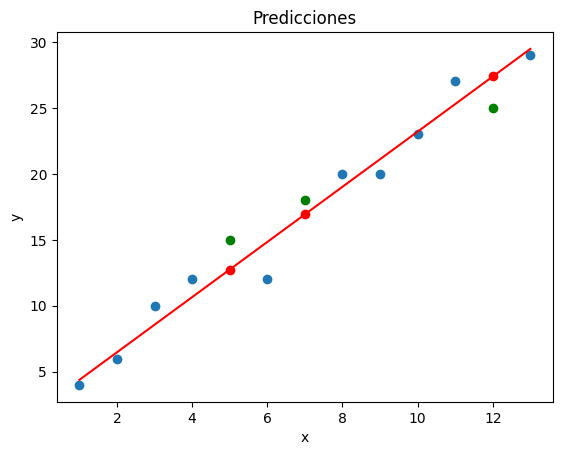

In [10]:
# Graficar las predicciones
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, color='g')
plt.scatter(X_test, y_pred, color='r')
plt.plot(X, modelo.coef_[0][0] * X + modelo.intercept_[0], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicciones')
plt.show()


Calculamos el error cuadrático medio.

In [11]:
# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)

print('Error cuadrático medio:', mse)

Error cuadrático medio: 3.9599322682820493


---
## <font color='008dc3'> Datos reales</font>

Usaremos el conjunto de datos `california_housing`, el cual 

In [12]:
# Datos reales desde sklearn (California Housing)
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing(as_frame=True)
df_california = california.frame.copy()

# Seleccionamos dos variables y el objetivo
df = df_california.copy()
df['y'] = california.target

# Mostrar los datos
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


---
## <font color='008dc3'> Características y etiquetas </font>

Ahora, separamos las características y las etiquetas.

In [13]:
# Dividir el conjunto de datos en características y etiquetas
features = ['MedInc', 'AveRooms']
X = df.loc[:, features]
y = df.loc[:, ['y']]

---
## <font color='008dc3'> Conjunto de entrenamiento y prueba </font>

Con esto, dividimos los datos en dos conjuntos: uno para entrenamiento y otro para prueba.

In [14]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Ahora, visualizamos el tamaño de los conjuntos de entrenamiento y prueba.

In [15]:
# Reviso las dimensiones de los conjuntos de datos
print('Dimensiones de los conjuntos de datos:')
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

Dimensiones de los conjuntos de datos:
X_train: (16512, 2)
y_train: (16512, 1)
X_test: (4128, 2)
y_test: (4128, 1)


---
## <font color='008dc3'> Entrenamiento </font>

Definimos un modelo de regresión lineal y lo entrenamos con los datos de entrenamiento.

In [19]:
# Crear el modelo y ajustarlo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Visualizar los coeficientes
print('Ecuación de la función:')
print('y =', modelo.coef_[0][0], '* MedInc +', modelo.coef_[0][1], '* AveRooms +', modelo.intercept_[0])


Ecuación de la función:
y = 0.4352864807139469 * MedInc + -0.03511611877729617 * AveRooms + 0.5759707629309274


---
## <font color='008dc3'> Evaluacion </font>

Realizamos predicciones con el conjunto de prueba y evaluamos el modelo.

In [17]:
# Predicciones del modelo
y_pred = modelo.predict(X_test)

# Comparar las predicciones con los datos de prueba
df_predicciones = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicción': y_pred.flatten()
})
display(df_predicciones.head())

,Actual,Predicción
0,1.369,2.184328
1,2.413,2.877290
2,2.007,2.260638
3,0.725,1.467568
4,4.600,2.602860


Calculamos el error cuadrático medio.

In [18]:
# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)

print('Error cuadrático medio:', mse)

Error cuadrático medio: 0.7101927490883555
